# Peparacion del data frame

## Configuración inicial y carga de datos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')
sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)

Cargar archivo

In [ ]:
import csv

with open('Anexo ET_demo_round_traces_2022.csv') as csvfile:
    df = pd.read_csv(csvfile, sep=";")


Limpiar nulos

In [ ]:
df.dropna(how='any', inplace=True)
null_values_new = df.isnull().sum()
print(null_values_new[null_values_new > 0])

Series([], dtype: int64)


Quitar variables con las que no se van a usar en el modelo

In [ ]:
droped_vars = ("AbnormalMatch","TravelledDistance","Map","InternalTeamId","MatchId",
               "RoundId","RoundWinner","Survived","RLethalGrenadesThrown","RNonLethalGrenadesThrown",
               "PrimaryAssaultRifle","PrimarySniperRifle","PrimaryHeavy","PrimarySMG","PrimaryPistol",
               "RoundAssists","RoundHeadshots","RoundFlankKills","MatchFlankKills","MatchAssists","MatchHeadshots",
               "MatchKills","Unnamed: 0")

for var in droped_vars:
  df = df.drop(var, axis=1)


transformar objeto a int

In [ ]:
# Transformar variables Objecto a int
try:
  df['TimeAlive'] = pd.to_numeric(df['TimeAlive'].str.replace('.', ''))
  df['FirstKillTime'] = pd.to_numeric(df['FirstKillTime'].str.replace('.', ''))
except Exception as e:
  print(f'{e}\n')


Transformar las variables categoricas Team y MatchWinner a binario.

Team:
* Terrorist: 0
* CounterTerrorist: 1

MatchWinner:
* True: 1
* False: 0

In [ ]:
df.Team.replace(to_replace=['Terrorist', 'CounterTerrorist'], value=[0, 1], inplace=True )
df.MatchWinner.replace(to_replace=['False', 'True'], value=[0, 1], inplace=True )
df.MatchWinner = df.MatchWinner.astype(int)

In [ ]:
df.head()

,Team,MatchWinner,TimeAlive,FirstKillTime,RoundKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue
0,0,1,51120248995704500,0,0,750,4400
1,0,1,4348662552266170,0,0,800,4400
2,0,1,3735469847054540,0,0,1000,4400
3,0,1,4767886136441470,0,0,850,4400
4,0,1,5312251089027310,0,0,1000,4400


## Objetivo

Utilizar las variables para determinar el tiempo de vida (TimeAlive) del jugador

# Arbol

In [ ]:
import sklearn.metrics
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [ ]:
x = np.array(df.drop("TimeAlive",axis=1))
y = np.array(df["TimeAlive"])
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x,y,test_size=0.2)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [1]:
model = DecisionTreeRegressor()
params = {"max_depth": np.arange(3,10),
          "min_samples_split": np.arange(5,15),
          "max_features": ("sqrt", "log2"),
          "criterion": ("squared_error", "friedman_mse", "absolute_error", "poisson")}
grid = GridSearchCV(estimator=model, param_grid=params,cv=10)
grid.fit(Xtrain, Ytrain)

NameError: name 'DecisionTreeRegressor' is not defined

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

0.0076744576492799085
{'criterion': 'poisson', 'max_depth': np.int64(7), 'max_features': 'sqrt', 'min_samples_split': np.int64(11)}


In [ ]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.017809,0.003950,0.001092,0.000191,squared_error,3,sqrt,5,"{'criterion': 'squared_error', 'max_depth': 3,...",0.003982,0.003282,0.007422,0.002953,0.005389,0.003624,0.001297,0.000914,0.005814,0.004767,0.003944,0.001899,190
1,0.017848,0.004039,0.000951,0.000144,squared_error,3,sqrt,6,"{'criterion': 'squared_error', 'max_depth': 3,...",0.004660,0.002444,0.003447,0.004878,0.004064,0.003972,0.008877,0.002649,0.004036,0.003499,0.004253,0.001708,164
2,0.018145,0.003708,0.001046,0.000148,squared_error,3,sqrt,7,"{'criterion': 'squared_error', 'max_depth': 3,...",0.005919,-0.001614,0.006564,0.004683,0.000209,0.004513,0.004993,0.001396,0.006542,0.001575,0.003478,0.002725,227
3,0.019104,0.001581,0.001089,0.000199,squared_error,3,sqrt,8,"{'criterion': 'squared_error', 'max_depth': 3,...",0.003776,0.003405,0.007893,0.002213,0.001839,0.005376,0.001011,-0.000881,0.004664,0.002748,0.003204,0.002318,244
4,0.017113,0.004670,0.001041,0.000150,squared_error,3,sqrt,9,"{'criterion': 'squared_error', 'max_depth': 3,...",0.004836,0.003545,0.004080,0.005511,0.002600,0.002475,0.005531,0.003170,0.004412,0.004409,0.004057,0.001040,177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,0.068103,0.003429,0.001342,0.000224,poisson,9,log2,10,"{'criterion': 'poisson', 'max_depth': 9, 'max_...",-0.003310,-0.012455,-0.007430,-0.000572,-0.006967,-0.005708,-0.007760,-0.017127,0.009986,0.000121,-0.005122,0.007026,365
556,0.070333,0.007469,0.001289,0.000325,poisson,9,log2,11,"{'criterion': 'poisson', 'max_depth': 9, 'max_...",-0.021261,-0.004335,-0.007192,-0.007302,-0.005675,-0.009516,-0.003505,-0.016283,0.000886,-0.011349,-0.008553,0.006116,389
557,0.070473,0.005008,0.001299,0.000245,poisson,9,log2,12,"{'criterion': 'poisson', 'max_depth': 9, 'max_...",-0.003632,-0.003087,-0.018170,-0.012414,-0.010479,0.003870,-0.007687,-0.016377,-0.002393,-0.001051,-0.007142,0.006751,378
558,0.074548,0.005531,0.001594,0.000620,poisson,9,log2,13,"{'criterion': 'poisson', 'max_depth': 9, 'max_...",-0.014251,0.000905,-0.010433,0.000659,-0.004335,-0.002933,-0.003796,-0.019483,-0.000648,-0.008425,-0.006274,0.006422,369


In [ ]:
mo2 = DecisionTreeRegressor(max_depth=5,min_samples_split=24)
mo2.fit(Xtrain, Ytrain)

Yhat = mo2.predict(Xtest)

mse = mean_squared_error(Ytest, Yhat)
mae = mean_absolute_error(Ytest, Yhat)
R2 = r2_score(Ytest, Yhat)

print("MSE: ",mse)
print("MAE: ",mae)
print("R^2: ",R2)

MSE:  2.066242928024247e+32
MAE:  9805315589116804.0
R^2:  0.020515029858900302


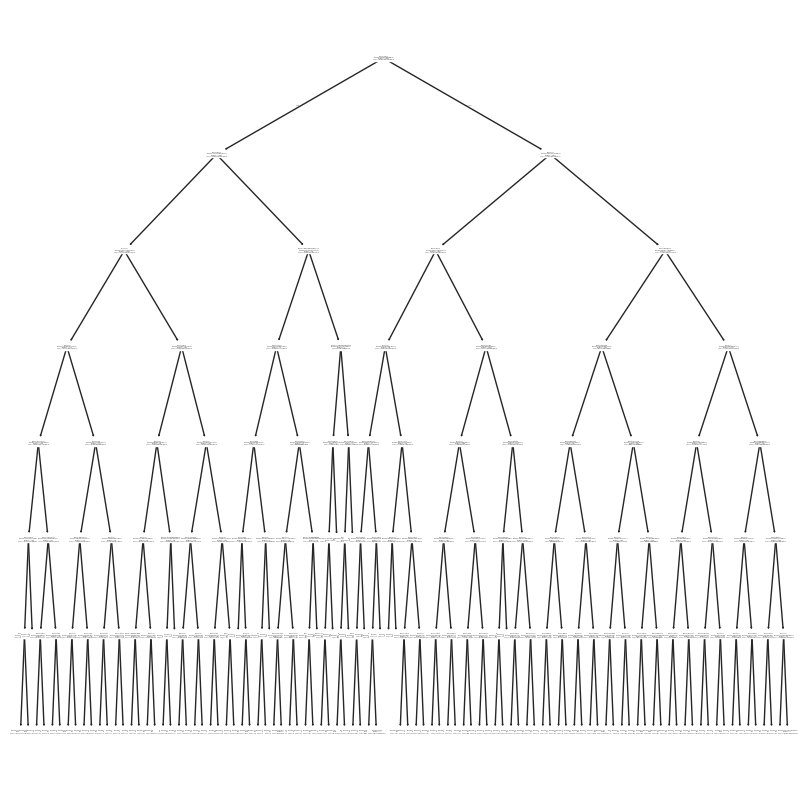

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.subplots(1,1,figsize=(10,10))
_= tree.plot_tree(grid.best_estimator_)

2.095308249114097e+32
9733319107678762.0
0.006736860422136615


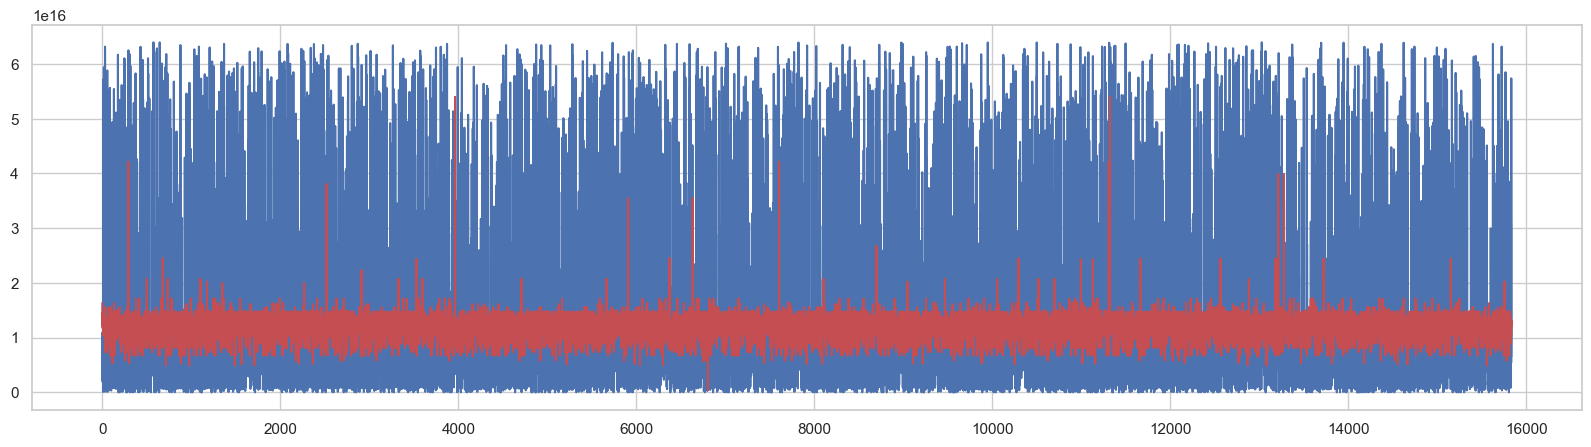

In [ ]:
Yhat = grid.predict(Xtest)

print(mean_squared_error(Ytest, Yhat))
print(mean_absolute_error(Ytest, Yhat))
print(r2_score(Ytest, Yhat))

import matplotlib.pyplot as plt
plt.subplots(figsize=(20,5))
plt.plot(Ytest)
plt.plot(Yhat, 'r')